This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html

This file contains a partial solution to a problem from
MacKay, "Information Theory, Inference, and Learning Algorithms."

    Exercise 3.15 (page 50): A statistical statement appeared in
    "The Guardian" on Friday January 4, 2002:

        When spun on edge 250 times, a Belgian one-euro coin came
        up heads 140 times and tails 110.  'It looks very suspicious
        to me,' said Barry Blight, a statistics lecturer at the London
        School of Economics.  'If the coin were unbiased, the chance of
        getting a result as extreme as that would be less than 7%.'

MacKay asks, "But do these data give evidence that the coin is biased
rather than fair?"

In [1]:
%matplotlib inline

In [2]:
import thinkbayes2
import thinkplot

In [13]:
def Percentile(pmf, percentage):
    """Computes a percentile of a given Pmf.

    percentage: float 0-100
    """
    p = percentage / 100.0
    total = 0
    for val, prob in pmf.Items():
        total += prob
        if total >= p:
            return val

In [3]:
class Euro(thinkbayes2.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: string 'H' or 'T'
        """
        x = hypo / 100.0
        if data == 'H':
            return x
        else:
            return 1-x

In [4]:
class Euro2(thinkbayes2.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like

In [5]:
def UniformPrior():
    """Makes a Suite with a uniform prior."""
    suite = Euro(range(0, 101))
    return suite

In [6]:
def TrianglePrior():
    """Makes a Suite with a triangular prior."""
    suite = Euro()
    for x in range(0, 51):
        suite.Set(x, x)
    for x in range(51, 101):
        suite.Set(x, 100-x) 
    suite.Normalize()
    return suite

In [7]:
def RunUpdate(suite, heads=140, tails=110):
    """Updates the Suite with the given number of heads and tails.

    suite: Suite object
    heads: int
    tails: int
    """
    dataset = 'H' * heads + 'T' * tails
    for data in dataset:
        suite.Update(data)



In [14]:
def Summarize(suite):
    """Prints summary statistics for the suite."""
    print(suite.Prob(50))

    print('MLE', suite.MaximumLikelihood())

    print('Mean', suite.Mean())
    print('Median', Percentile(suite, 50))

    print('5th %ile', Percentile(suite, 5))
    print('95th %ile', Percentile(suite, 95))

    print('CI', thinkbayes2.CredibleInterval(suite,90))

In [9]:
def PlotSuites(suites, root):
    """Plots two suites.

    suite1, suite2: Suite objects
    root: string filename to write
    """
    thinkplot.PrePlot(len(suites))
    thinkplot.Pmfs(suites)

    thinkplot.Config( xlabel='x',
                     ylabel='Probability')


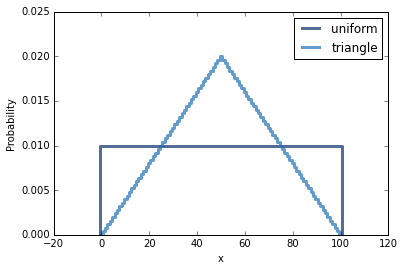

In [16]:
suite1 = UniformPrior()
suite1.label = 'uniform'

suite2 = TrianglePrior()
suite2.label = 'triangle'

    # plot the priors
PlotSuites([suite1, suite2], 'euro2')

0.0009822003927973451
MLE 56
Mean 55.9840425531915
Median 56
5th %ile 53
95th %ile 59
CI (53, 59)


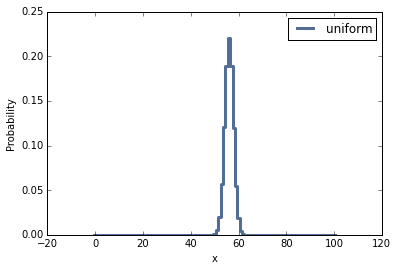

In [19]:
    # update
RunUpdate(suite1)
Summarize(suite1)
PlotSuites([suite1], 'euro1')

0.0011157409279070817
MLE 56
Mean 55.909750487433186
Median 56
5th %ile 53
95th %ile 59
CI (53, 59)


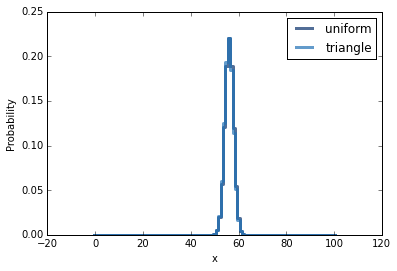

In [21]:
RunUpdate(suite2)
Summarize(suite2)

    # plot the posteriors
PlotSuites([suite1, suite2], 'euro3')